In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic=pd.read_csv('titans.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.keys()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

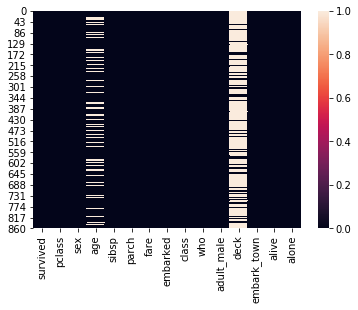

In [6]:
# To check null values via heat map plot
sns.heatmap(titanic.isnull())

In [7]:
# We can replace or remove these null values

titanic['age'].replace(np.NaN,titanic['age'].mean(),inplace=True)

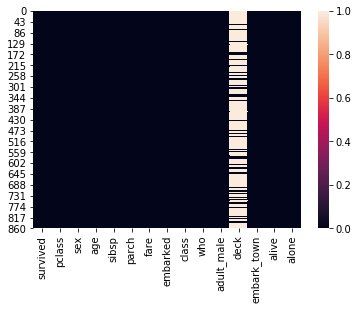

In [8]:
sns.heatmap(titanic.isnull())

In [9]:
# most of the data in 'deck' is missing so we can drop it 
titanic.drop(['deck'],axis=1,inplace=True)

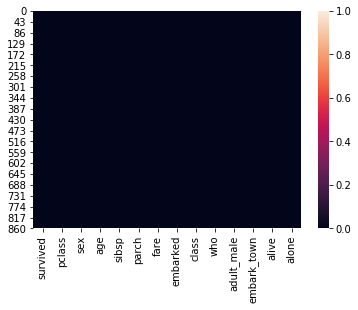

In [10]:
sns.heatmap(titanic.isnull())

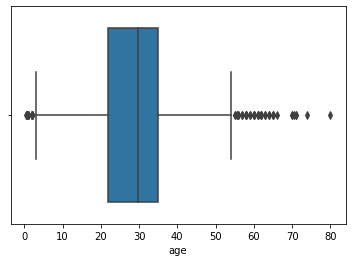

In [11]:
sns.boxplot(titanic['age'])

survived       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
pclass      AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
age         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
sibsp       AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
parch       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
fare        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
dtype: object

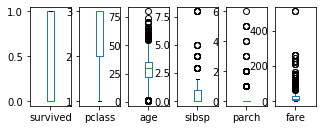

In [12]:
titanic.plot(kind='box',subplots=True, layout=(2,7))

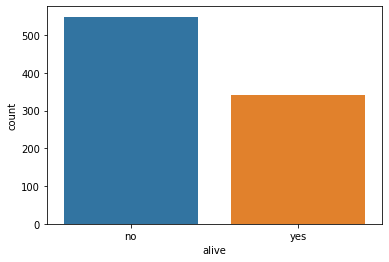

In [13]:
 #Count plot and count values for any key in data
sns.countplot(titanic['alive'])

In [14]:
titanic['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [15]:
# By this plot we can see that more number of women survived than the men



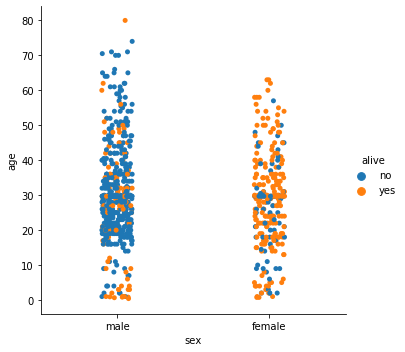

In [16]:
sns.catplot(x='sex',y='age',data=titanic,hue='alive',kind='strip')

In [17]:
# The above plot shows that more male passengers are died compared to females 

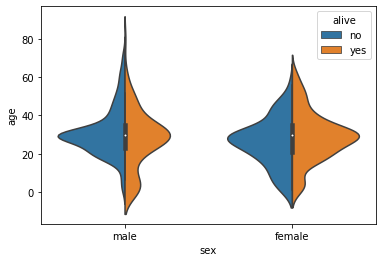

In [18]:
sns.violinplot(x='sex',y='age',hue='alive',data=titanic,split=True)

In [19]:
# The above plot shows that males and females of age between 20-40 years are survived more.

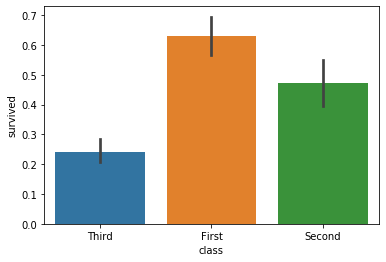

In [20]:
sns.barplot(x='class',y='survived', data=titanic)

In [21]:
# The above plot shows that nearly 25% of 3rd class passenger are survived 
# while around 62% passengers from 1st class are survived and nearly 50% of passengers from 2nd class are survived

In [22]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

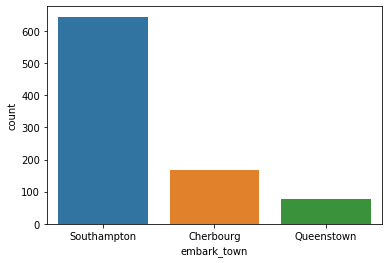

In [23]:
sns.countplot(titanic['embark_town'])

In [24]:
# The above plot shows that there are only 3 embark stations/stops and 644 passengers are embarked from 'Southampton' 
# and nearly 168 from 'Cherbourg' and only 77 from 'Queenstown'

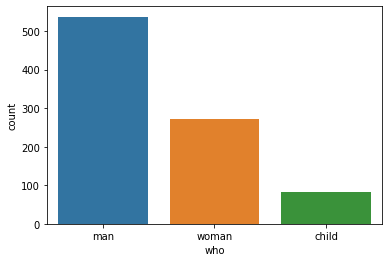

In [25]:
sns.countplot(titanic['who'])

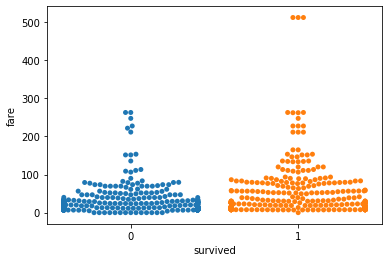

In [26]:
sns.swarmplot(x='survived',y='fare',data=titanic)

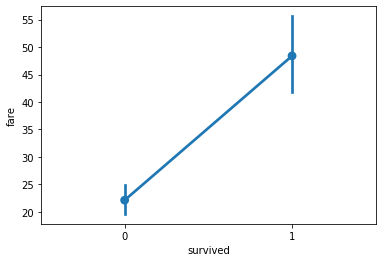

In [27]:
sns.pointplot(x='survived',y='fare',data=titanic)

In [28]:
# From above plots we can conclude that people who paid high fare/ticket prices are survived

In [29]:
# In this data set we need encryption as data is not in the form of string/numbers

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['sex','embarked']
for val in list:
    titanic[val]=le.fit_transform(titanic[val].astype(str))

In [30]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1 3]


In [31]:
titanic.skew()

survived      0.478523
pclass       -0.630548
sex          -0.618921
age           0.434488
sibsp         3.695352
parch         2.749117
fare          4.787317
embarked     -1.246689
adult_male   -0.420431
alone        -0.420431
dtype: float64

In [32]:
# Scaling of data 

x=titanic.iloc[:,1:8]
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [33]:
y=titanic.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517,  0.58111394],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529, -1.93846038],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426,  0.58111394],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  2.00893337,
        -0.17626324,  0.58111394],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104, -1.93846038],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783, -0.67867322]])

In [35]:
# Perfroming Regression , Machine learningimport sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Checking for best random_state to 
max_r_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state = r_state,test_size=0.20)
    lr=linear_model.LogisticRegression()
    lr.fit(train_x,train_y)
    pred=lr.predict(test_x)
    r2_scr=r2_score(test_y,pred)
    print('r2_score corresponding to random state: ',r_state, 'is' , r2_scr)
    if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42 is 0.2167310167310167
r2_score corresponding to random state:  43 is -0.10843214756258246
r2_score corresponding to random state:  44 is -0.06409925045231346
r2_score corresponding to random state:  45 is 0.30907085745795426
r2_score corresponding to random state:  46 is 0.33448717948717954
r2_score corresponding to random state:  47 is 0.20235910878112706
r2_score corresponding to random state:  48 is 0.042905581637975976
r2_score corresponding to random state:  49 is 0.22699055330634277
r2_score corresponding to random state:  50 is 0.18202589489718213
r2_score corresponding to random state:  51 is 0.06624934793948867
r2_score corresponding to random state:  52 is 0.18396352909627256
r2_score corresponding to random state:  53 is 0.039957093054438286
r2_score corresponding to random state:  54 is 0.09355010660980789
r2_score corresponding to random state:  55 is 0.0566534914361001
r2_score corresponding to random state:  56 is 0.24069512862

In [39]:
# Finding best parametere usning GridsearchCV to perfom machine learning effeciently for different methods 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
SV=SVC()
paramSV={'kernel' : ['linear','poly'],'random_state' : range(42,100)}
search=GridSearchCV(estimator=SV,param_grid=paramSV,scoring='accuracy',cv=5)
search.fit(train_x,train_y)
search.best_params_

{'kernel': 'poly', 'random_state': 42}

In [38]:

from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
paramDT={'criterion' : ['gini','entropy'],'random_state' : range(42,100)}
searchDT=GridSearchCV(estimator=DT,param_grid=paramDT,scoring='accuracy',cv=5)
searchDT.fit(train_x,train_y)
searchDT.best_params_




{'criterion': 'gini', 'random_state': 73}

In [40]:
LR=LogisticRegression()
paramLR={'random_state' : range(42,100)}
searchLR=GridSearchCV(estimator=LR,param_grid=paramLR,scoring='accuracy',cv=5)
searchLR.fit(train_x,train_y)
searchLR.best_params_

{'random_state': 42}

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
import sklearn.naive_bayes

In [56]:
# Using these above best parameters with respective methods
DT=DecisionTreeClassifier(criterion='entropy',random_state=73)
SV=SVC(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=6)
GN=GaussianNB()
MB=MultinomialNB()
LR=LogisticRegression(random_state=42)
BN=BernoulliNB()


In [57]:
models=[]
models.append(('DecisionTreeClassifier', DT))
models.append(('SVC', SV))
models.append(('KNeighborsClassifier',KNN))
models.append(('GaussianNB', GN))
models.append(('LogisticRegression', LR))
models.append(('BernoulliNB', BN))

**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=73, splitter='best')


Accuracy Score =  0.7932960893854749


Cross Value Score =  0.7779483032572919


roc_auc_score =  0.7886538461538461


Classification_report 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       104
           1       0.75      0.76      0.75        75

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



[[85 19]
 [18 57]]


AxesSubplot(0.125,0.808774;0.62x0.071226

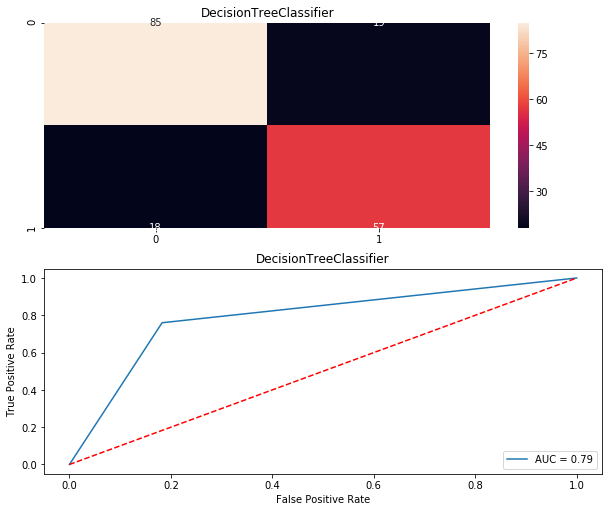

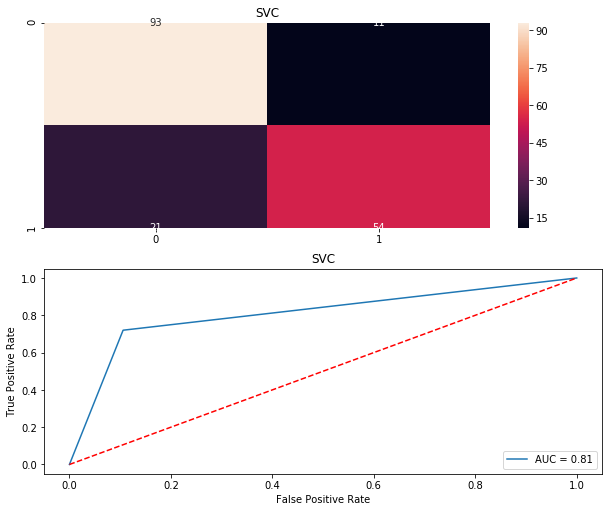

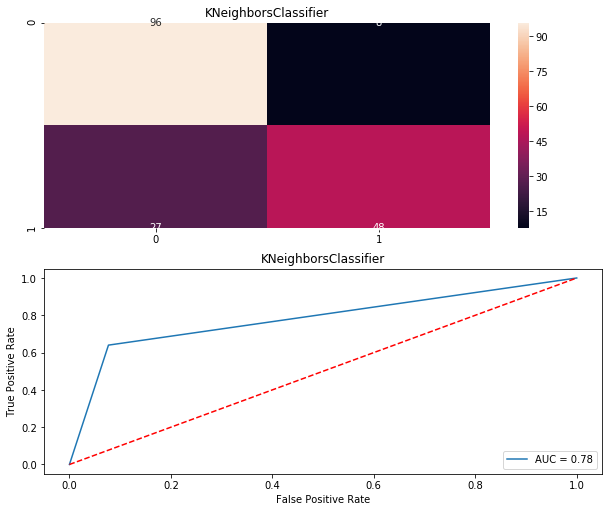

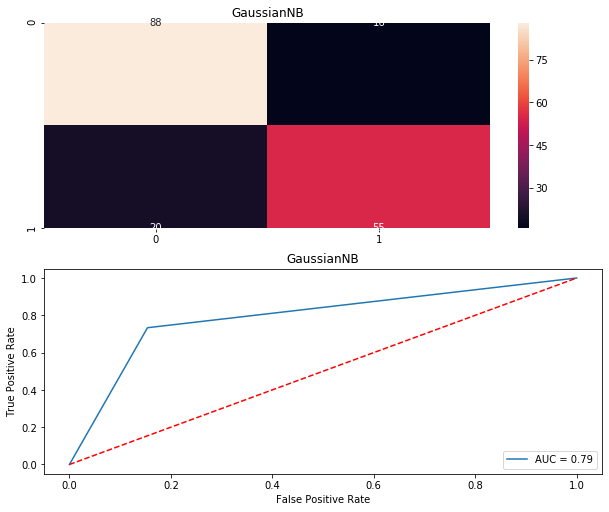

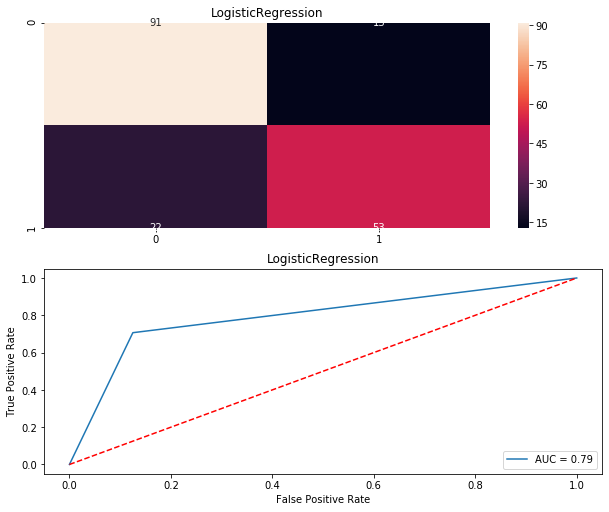

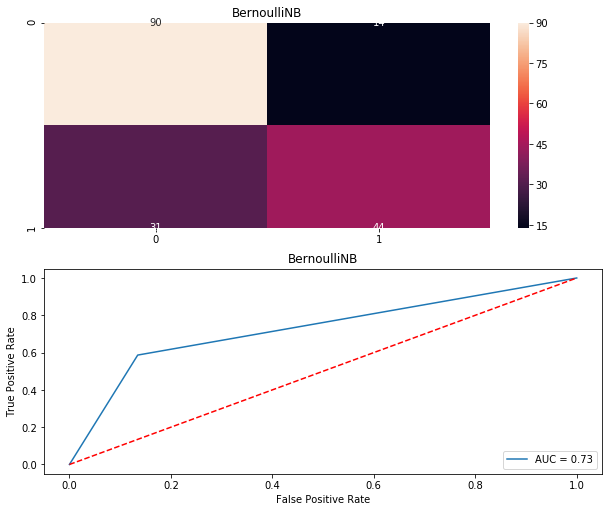

In [58]:
Model=[]
Score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('****************', name, '****************')
    print('\n')
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    print('\n')
    AS= accuracy_score(test_y,pre)
    print('Accuracy Score = ', AS)
    Score.append(AS*100)
    print('\n')
    SC=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score = ', SC)
    CVS.append(SC*100)
    print('\n')
    false_positive_rate, true_positive_rate,thresolds= roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification_report \n', classification_report(test_y,pre))
    print('\n')
    cm= confusion_matrix(test_y,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [59]:
result= pd.DataFrame({'Model' : Model, 'Accuracy_Score' : Score, 'Cross_val_score' : CVS, 'Roc_auc_curve': rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,DecisionTreeClassifier,79.329609,77.794830,78.865385
1,SVC,82.122905,82.610146,80.711538
2,KNeighborsClassifier,80.446927,80.467569,78.153846
3,GaussianNB,79.888268,78.688713,78.974359
4,LogisticRegression,80.446927,79.580127,79.083333
5,BernoulliNB,74.860335,77.455170,72.602564


In [50]:
# we can see that Suppor Vector Classifer(SVC) model is working best among others so we should take this model as final model

In [51]:
#Now we will save this model 

from sklearn.externals import joblib 
# Save the model as a pickle in a file 
joblib.dump(SV, 'SVC_concrete.pkl')

['SVC_concrete.pkl']